# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The No-show appointments dataset is a collection of medical appointments that occurred in Brazil. The dataset is centered around if patients showed up for their appointment. The columns available in this dataset and their definitions are below:

- PatientId - Unique identifer of a patient
- AppointmentID - Unique identifier of the appointment
- Gender - Patient's gender M/F
- ScheduledDay - Date that the patient booked their appointment
- AppointmentDay - Date of the appointment
- Age - Patient age
- Neighbourhood - Appointment location
- Scholarship - Is the patient on welfare
- Hipertension - Does the patient have hypertension
- Diabetes - Does the patient have diabetes
- Alcoholism - Is the patient an alcoholic
- Handcap - Is the patient handicap
- SMS_received - Appointment reminders sent to patient via text
- No-show - Did the patient miss their appointment?


### Question for Analysis

What characteristic of a patient has the greatest impact on whether or not they show up to their appointment?
 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
#!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling


In [4]:
df = pd.read_csv('noshows.csv') #load data
print(df.head()) #check first few lines and ensure data loaded
df.info() #show data types and nonnull



      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

Data appears to have loaded correct and all columns are complete with data. Several columns will not be utilzed for this analysis and can be dropped. PatientId, AppointmentID, ScheduledDay, AppointmentDay, and Neighbourhood are the columns that will be dropped. All of these columns are not characteristics of the patient themselves.

In [5]:
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1)#drop columns
print(df.head())

  Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0      F   62            0             1         0           0        0   
1      M   56            0             0         0           0        0   
2      F   62            0             0         0           0        0   
3      F    8            0             0         0           0        0   
4      F   56            0             1         1           0        0   

   SMS_received No-show  
0             0      No  
1             0      No  
2             0      No  
3             0      No  
4             0      No  


Columns were successfully dropped. No-show is storing strings and should be converted to 0/1 for No and Yes respectively. This will make the column easier to handle.

In [6]:
df['No-show'] = df['No-show'].replace({'No': 0, 'Yes': 1}) #convert no to 0/ yes to 1
print(df.head()) #confirm change

  Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0      F   62            0             1         0           0        0   
1      M   56            0             0         0           0        0   
2      F   62            0             0         0           0        0   
3      F    8            0             0         0           0        0   
4      F   56            0             1         1           0        0   

   SMS_received  No-show  
0             0        0  
1             0        0  
2             0        0  
3             0        0  
4             0        0  


Transformation of No-show appears successful as shown by the head print. Next, I will check for unique values to ensure that No-show only displays two value types. 

In [7]:
df.nunique() #show number of unique entries

Gender            2
Age             104
Scholarship       2
Hipertension      2
Diabetes          2
Alcoholism        2
Handcap           5
SMS_received      2
No-show           2
dtype: int64

Checking for unique values shows that Handicap has 5 unique values. This may be related to the type or severity of the patient's handicap but is not needed for this analysis and will need to be cleaned.


### Data Cleaning

Before cleaning Handicap I need to see what the 5 unique values are.
 

In [8]:
handicap_unique = df['Handcap'].unique() # get unique values for handcap column
print(handicap_unique)


[0 1 2 3 4]


The values being 0 to 4 does align with the theory that this relates to the type or severity of handicap. Since the definitions of these individual values are unknown, we can standardize the column as we did with No-show. All values greater than 1 will be set to 1.

In [9]:
df['Handcap'] = df['Handcap'].apply(lambda x:1 if x>1 else x) # check if handcap value > 1, if so set to 1, else keep x
handicap_unique = df['Handcap'].unique() # get unique values for handcap column(again)
print(handicap_unique)

[0 1]


This transformation retains the column's definition of whether or not the patient is handicapped and removes the additional coding related to their type of handicap. Next, lets fix Handcap and Hipertension spelling. Finally, let's rename No-show and SMS_received to remove special characters.

In [10]:
df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension', 'No-show':'Noshow','SMS_received':'SMSreceived'}, inplace=True)#rename columns 
print(df.head()) #confirm change

  Gender  Age  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0      F   62            0             1         0           0         0   
1      M   56            0             0         0           0         0   
2      F   62            0             0         0           0         0   
3      F    8            0             0         0           0         0   
4      F   56            0             1         1           0         0   

   SMSreceived  Noshow  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  


<a id='eda'></a>
## Exploratory Data Analysis


### What characteristic of a patient has the greatest impact on whether or not they show up to their appointment?

Let's split the data of noshows based on whether or not the patient showed up.

In [11]:
df_noshow = df.query('Noshow == 1')#limit to only noshows
print(df_noshow.head())
print('-----------------------')
df_show = df.query('Noshow == 0')#limit to only show
print(df_show.head())



   Gender  Age  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
6       F   23            0             0         0           0         0   
7       F   39            0             0         0           0         0   
11      M   29            0             0         0           0         0   
17      F   40            1             0         0           0         0   
20      F   30            0             0         0           0         0   

    SMSreceived  Noshow  
6             0       1  
7             0       1  
11            1       1  
17            0       1  
20            0       1  
-----------------------
  Gender  Age  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0      F   62            0             1         0           0         0   
1      M   56            0             0         0           0         0   
2      F   62            0             0         0           0         0   
3      F    8            0             0         0   

Now let's see if we can visually discern a pattern with patients that did not show.

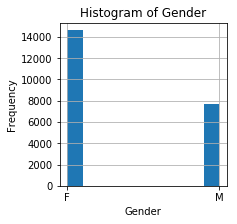

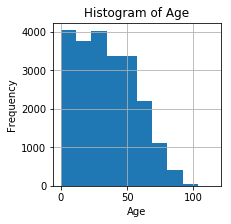

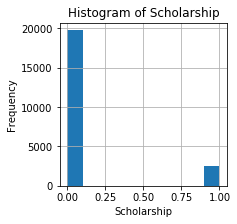

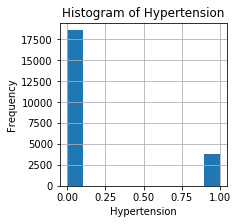

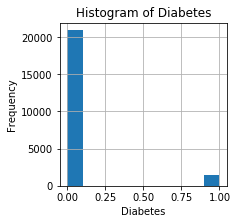

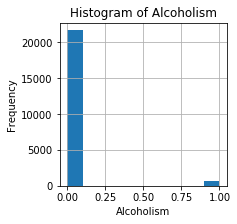

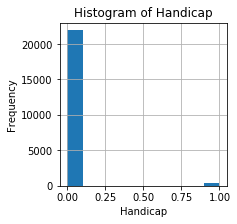

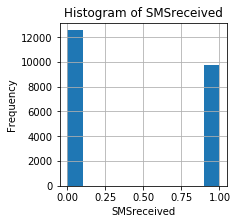

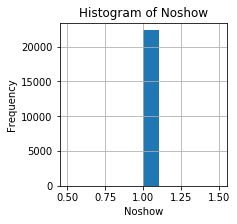

In [12]:
for column in df_noshow.columns:
    plt.figure(figsize=(3, 3)) 
    plt.hist(df_noshow[column]) 
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Gender and Age appear to be the most substantial factor if a patient did not show. Let's compare these two columns with patients that did show.

Noshows


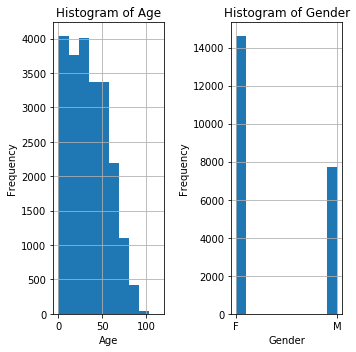

---------------
Shows


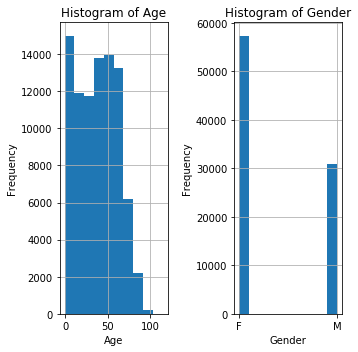

In [13]:
def plot_hist(frame, column1, column2):
    fig, axes = plt.subplots(1,2,figsize=(5,5))
    
    axes[0].hist(frame[column1])
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)
    
    axes[1].hist(frame[column2])
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
print('Noshows')
plot_hist(df_noshow, 'Age','Gender')
print('---------------')
print('Shows')
plot_hist(df_show, 'Age','Gender')

The ratio of gender and age appear to be the similar regardless whether or not the patient showed. To further confirm this we can statistically verify.

In [14]:
def gender_percent(frame):
    count_gender = frame['Gender'].value_counts() #get male and female count
    
    total = len(frame) #get total entries
    
    male_percent = (count_gender['M']/total)*100 #percentage of male
    female_percent = (count_gender['F']/total)*100 #percentage of female
    
    print(f'Male Percentage: {male_percent:.2f}%')
    print(f'Female Percentage: {female_percent:.2f}%')

print('Noshows')
print(df_noshow['Age'].describe())
gender_percent(df_noshow)
print('---------------')
print('Shows')
print(df_show['Age'].describe())
gender_percent(df_show)



Noshows
count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64
Male Percentage: 34.61%
Female Percentage: 65.39%
---------------
Shows
count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64
Male Percentage: 35.10%
Female Percentage: 64.90%


As I suspected from the previous graph it appears gender nor age alone greatly indicate if a patient will show up to their appointment. A step further into these variables may be necessary to find a relation. Let's look again and explore them together.

Noshows


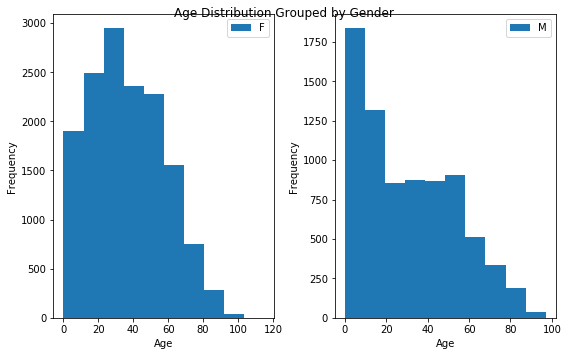

-----------------
Shows


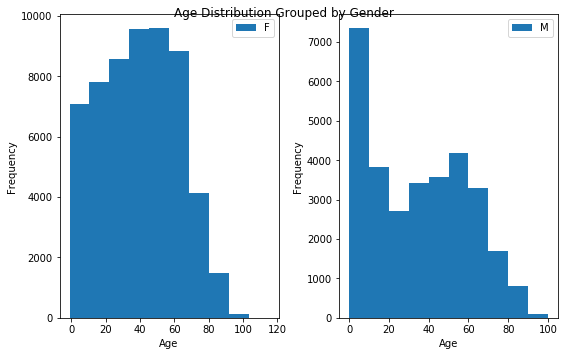

In [15]:
def gender_age_hist(frame):
    gender_group = frame.groupby('Gender') #group by gender
    
    fig, axes = plt.subplots(1,2, figsize=(8,5)) 
    
    #create histograms and iterate over group
    for (name, group), ax in zip(gender_group, axes):
        ax.hist(group['Age'], label=name)
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    fig.suptitle('Age Distribution Grouped by Gender')
    
    plt.tight_layout()
    
    plt.show()
    
print('Noshows')
gender_age_hist(df_noshow)
print('-----------------')
print('Shows')
gender_age_hist(df_show)
    

It appears that females between the age of 20 and 40 are more likely to not show up for an appointment. Let's plot this a different way focused on this range to get a better view.

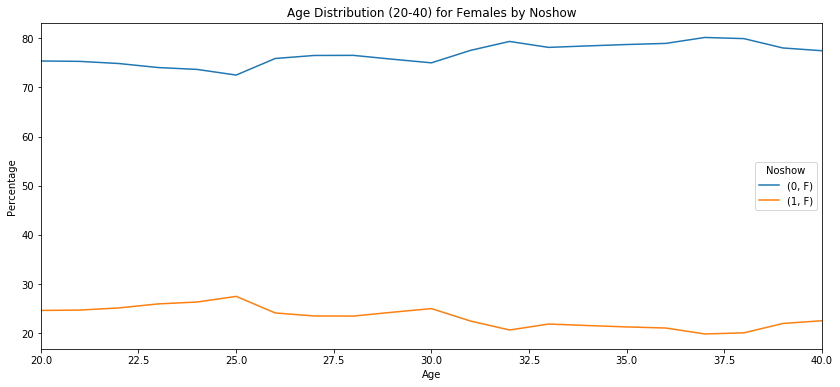

In [44]:
#filter main dataframe to ages 20 to 40 and females
female_20_40_df = df[(df['Age']>=20) & (df['Age']<=40) & (df['Gender'] == 'F')]
#group and get percentage distribution for frame 
result = female_20_40_df.groupby(['Age','Gender'])['Noshow'].value_counts(normalize=True).mul(100).unstack('Noshow').unstack('Gender')

#plot data
result.plot(figsize=(14,6))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age Distribution (20-40) for Females by Noshow')
plt.legend(title='Noshow')
plt.show()


Looking at it this way doesn't indicate any particular age range between 20 and 40 that is more likely to not show for an appointment.

<a id='conclusions'></a>
## Conclusions


Based off this analysis, I was unable to determine a characteristic of the patient that signficantly indicates whether or not they will show up to their appointment. Additional information, such as the reason for cancellation would aid this analysis to be more conclusive.

### Limitation

The exploration done in this report was not inclusive of all fields in the dataset and focused on a few patient characteristics. Additional analysis on each patient, appointment location, and the remaining available fields should be conducted to remove this report's limitation. 


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0